# **Análisis de Calidad de Agua Regresión Logísitica Binaria** 🤽

## **1. Descripción de las variables**

1. ph: pH del agua (de 0 a 14).
2. Dureza: Capacidad del agua para precipitar el jabón en mg/L.
3. Sólidos: Sólidos totales disueltos en ppm.
4. Cloraminas: Cantidad de Cloraminas en ppm.
5. Sulfatos: Cantidad de Sulfatos disueltos en mg/L.
6. Conductividad: Conductividad eléctrica del agua en μS/cm.
7. Carbono_orgánico: Cantidad de carbono orgánico en ppm.
8. Trihalometanos: Cantidad de trihalometanos en μg/L.
9. Turbidez: Medida de la propiedad de emisión de luz del agua en NTU.
10. Potabilidad: Indica si el agua es segura para el consumo humano. Potable -1 y No potable -0

## **2. Importar Librerías**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## **3. Incorporar el Dataset**

In [2]:
Cagua = pd.read_csv('/content/water_potability.csv')

Cagua.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
##Función para evaluar datos NAN = Not a Number
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Columna", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

###Revisión de datos NAN
datos_NAN(Cagua)

Dimensiones: 3276 filas, 10 columnas
Total valores NAN: 1434
                          Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                                      ph    float64        2785        491
                                Hardness    float64        3276          0
                                  Solids    float64        3276          0
                             Chloramines    float64        3276          0
                                 Sulfate    float64        2495        781
                            Conductivity    float64        3276          0
                          Organic_carbon    float64        3276          0
                         Trihalomethanes    float64        3114        162
                               Turbidity    float64        3276          0
                              Potability      int64           2          0


## **4. Gráficas Exploratorias**

In [5]:
lista= list(Cagua.columns)
lista

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

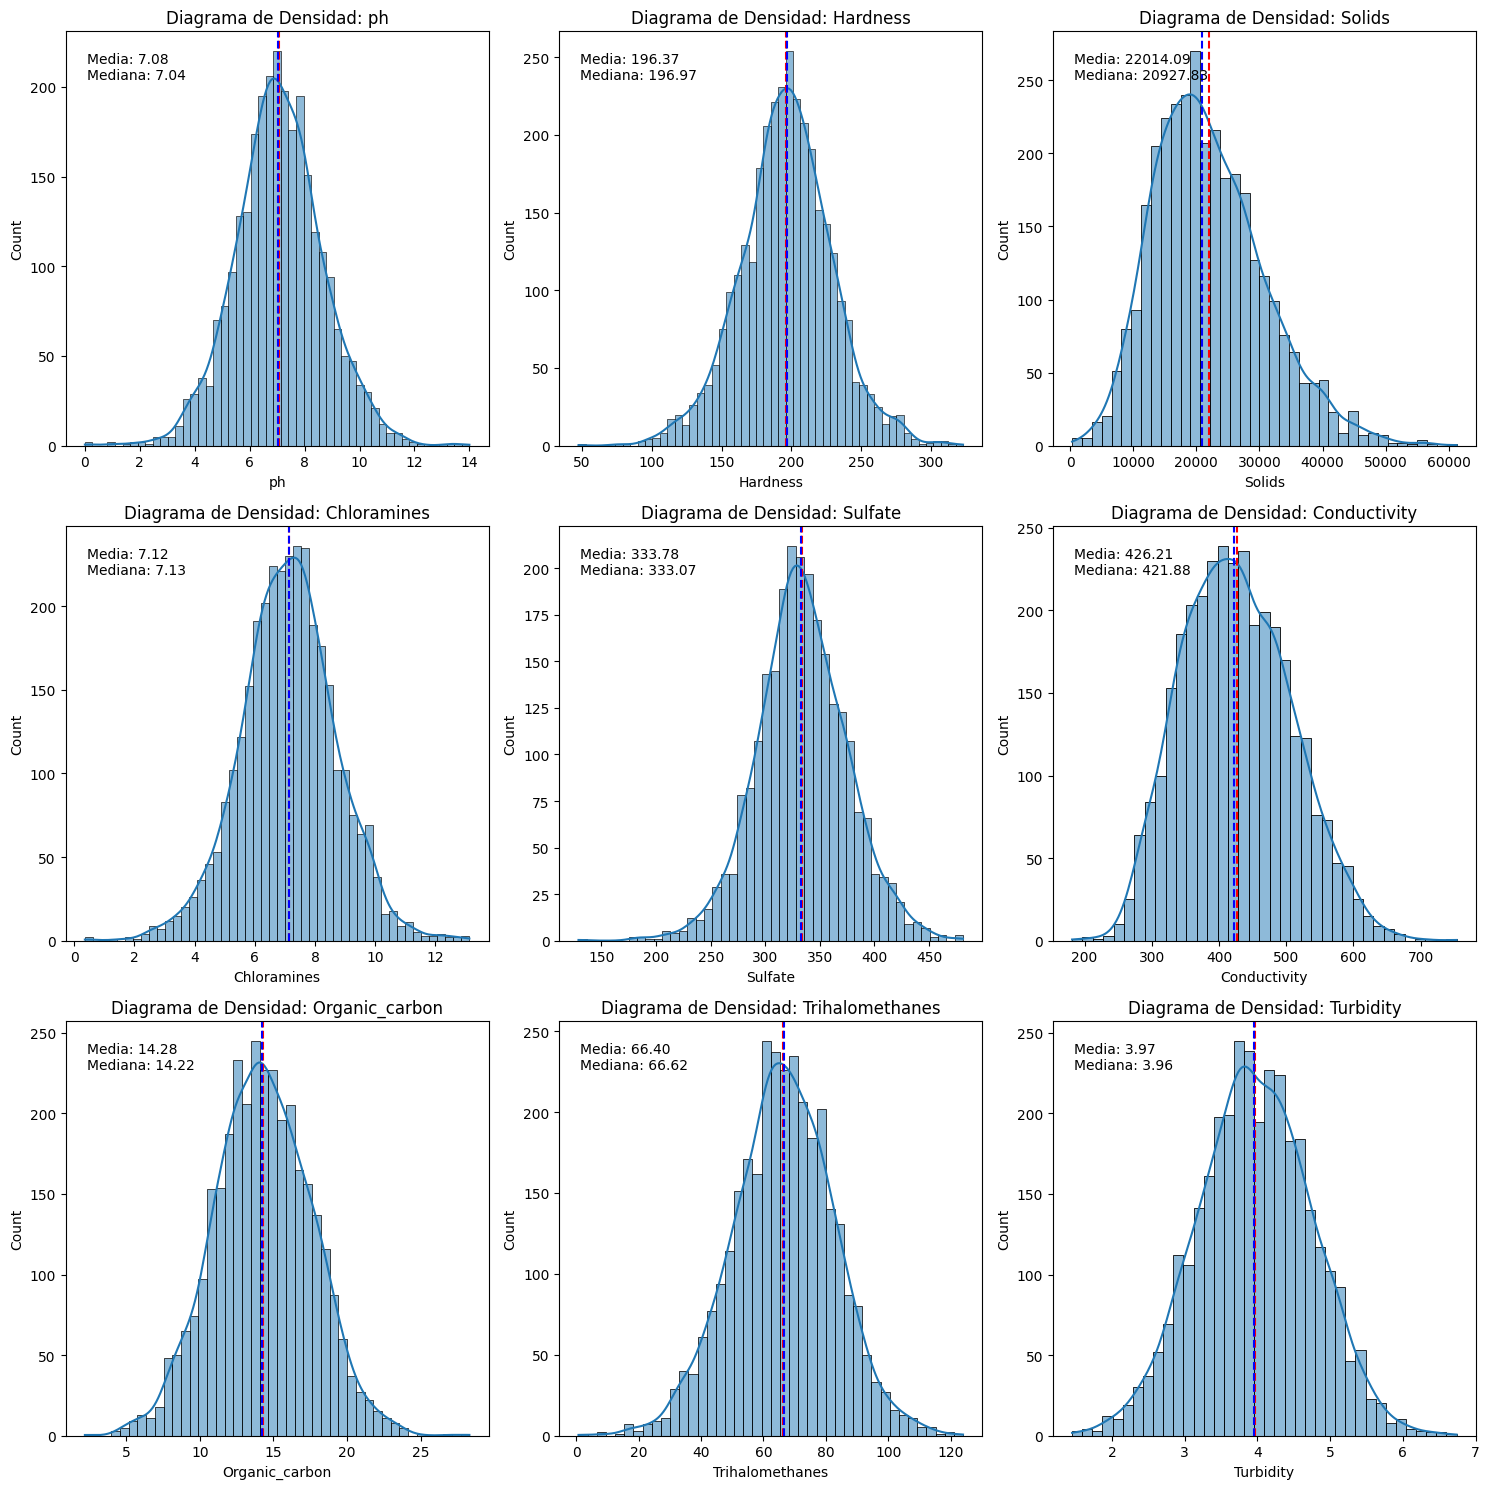

In [6]:
variables = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

fig , axes = plt.subplots(3,3, figsize=(15,15))

axes = axes.flatten()

for i , var in enumerate(variables):
  ax = axes[i]
  sns.histplot(Cagua[var], kde = True, ax=ax)
  ax.axvline(Cagua[var].mean(), color='red', linestyle='--', label='Media')
  ax.axvline(Cagua[var].median(), color='blue', linestyle='--', label='Mediana')

  ax.annotate(f"Media: {Cagua[var].mean():.2f}\nMediana: {Cagua[var].median():.2f}",
              xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')
  ax.set_title(f"Diagrama de Densidad: {var}")
  ax.set_xlabel(var)

plt.tight_layout()


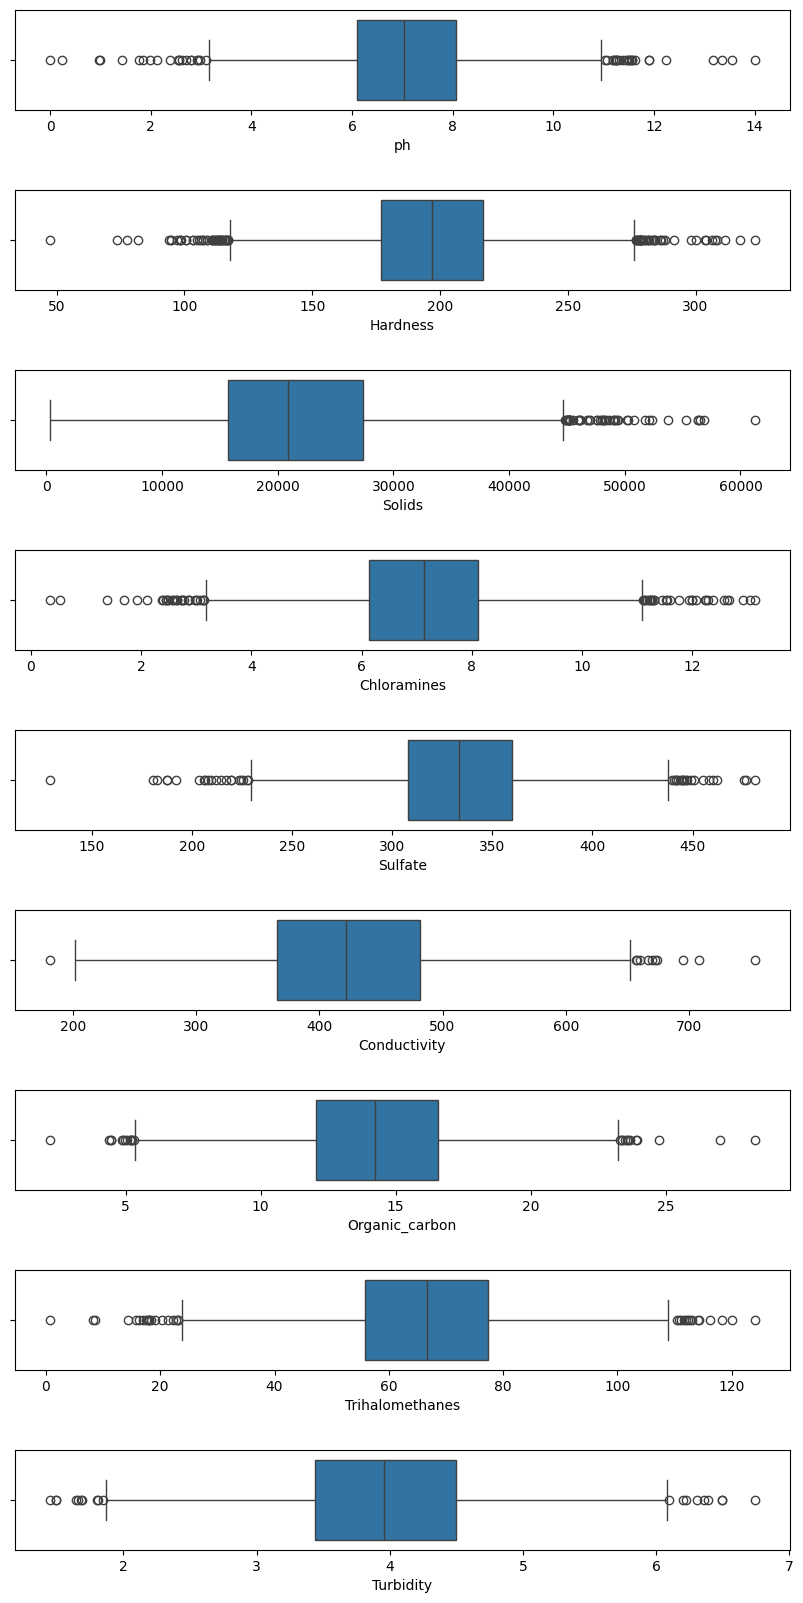

In [7]:
###Revisión del ruido
columnas = Cagua.columns
fig, ax = plt.subplots(9,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(9):
  sns.boxplot(x=columnas[i], data=Cagua, ax=ax[i])

In [8]:
##revisión del ruido

for k, v in Cagua.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0]*100 / np.shape(Cagua)[0]
  print('Columna %s ruido= %s' % (k, porc))

Columna ph ruido= 1.404151404151404
Columna Hardness ruido= 2.5335775335775335
Columna Solids ruido= 1.4346764346764347
Columna Chloramines ruido= 1.862026862026862
Columna Sulfate ruido= 1.2515262515262515
Columna Conductivity ruido= 0.33577533577533575
Columna Organic_carbon ruido= 0.7631257631257631
Columna Trihalomethanes ruido= 1.0073260073260073
Columna Turbidity ruido= 0.57997557997558
Columna Potability ruido= 0.0


In [9]:
##Limpieza del ruido
df_median = Cagua.copy()

for col in df_median.columns:
  mean = df_median[col].mean()
  std = df_median[col].std()
  outliers = (df_median[col] < mean - 1.5 * std) | (df_median[col] > mean + 1.5 * std)
  df_median.loc[outliers,col] = df_median[col].median()

In [10]:
for k, v in df_median.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3-q1
  v_col = v[(v <= q1 - 1.5 *iqr) |(v >= q3 + 1.5 * iqr)]
  porc = np.shape(v_col)[0]*100 / np.shape(df_median)[0]
  print('Columna %s ruido= %s' % (k, porc))

Columna ph ruido= 0.0
Columna Hardness ruido= 0.0
Columna Solids ruido= 0.0
Columna Chloramines ruido= 0.0
Columna Sulfate ruido= 0.0
Columna Conductivity ruido= 0.0
Columna Organic_carbon ruido= 0.0
Columna Trihalomethanes ruido= 0.0
Columna Turbidity ruido= 0.0
Columna Potability ruido= 0.0


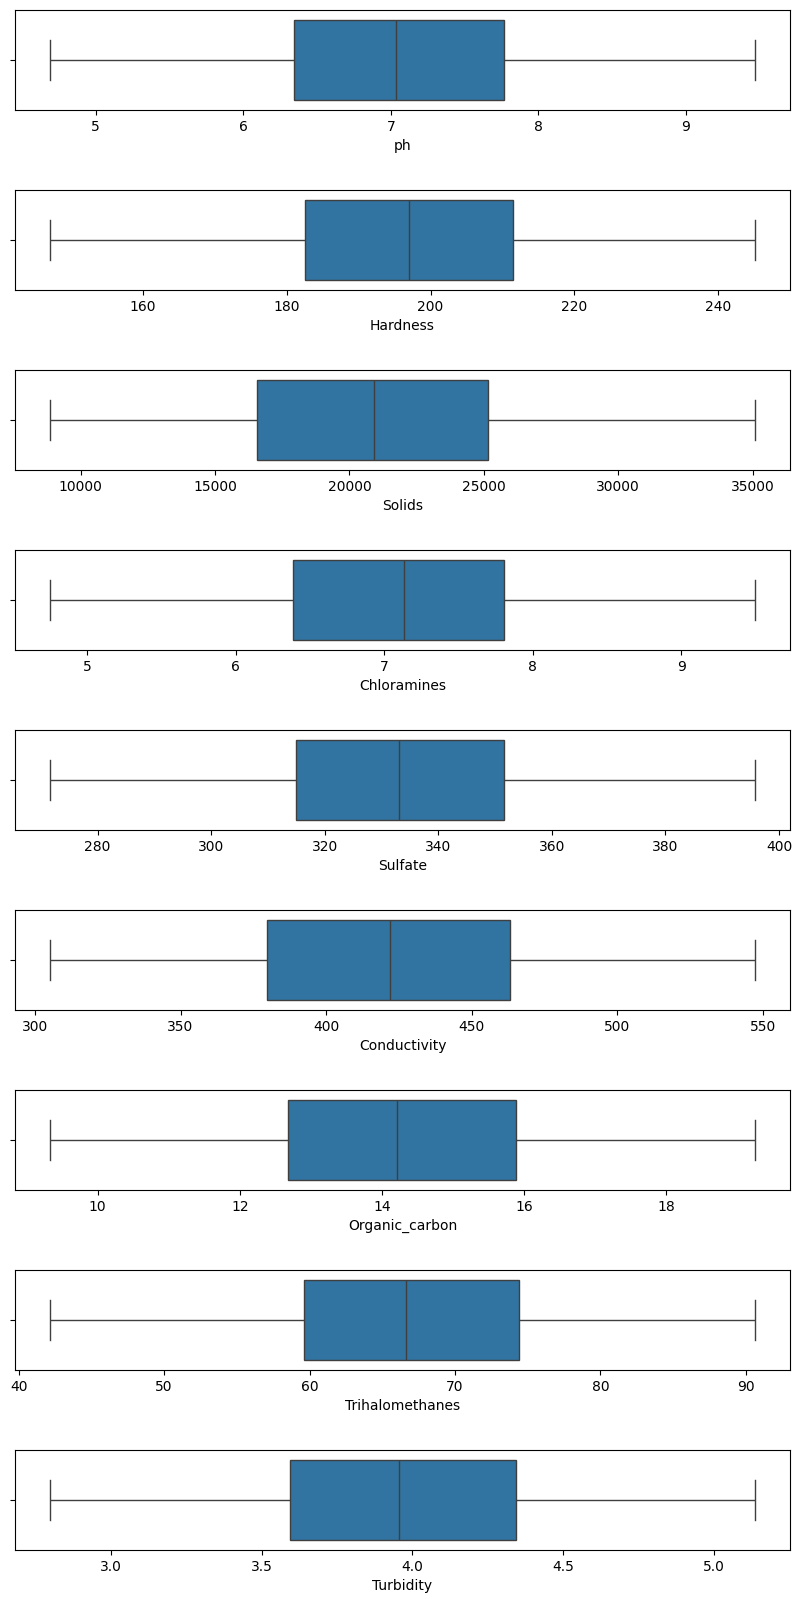

In [11]:
###Revisión del ruido
columnas = df_median.columns
fig, ax = plt.subplots(9,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(9):
  sns.boxplot(x=columnas[i], data=df_median, ax=ax[i])

In [ ]:
##revisión del dataframe df_median en caso de dato NAN
datos_NAN(df_median)

Dimensiones: 3276 filas, 10 columnas
Total valores NAN: 1434
                          Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                                      ph    float64        2426        491
                                Hardness    float64        2869          0
                                  Solids    float64        2885          0
                             Chloramines    float64        2844          0
                                 Sulfate    float64        2188        781
                            Conductivity    float64        2834          0
                          Organic_carbon    float64        2838          0
                         Trihalomethanes    float64        2705        162
                               Turbidity    float64        2847          0
                              Potability      int64           2          0


In [12]:
##Limpieza de datos NAN
##Función para limpieza de media o mediana => numéricas
def imputacionNa(df, nomcol, param):
    if param == 'media':
        df[nomcol]= df[nomcol].fillna(df[nomcol].mean())
        return df[nomcol]
    elif param == 'mediana':
        df[nomcol]= df[nomcol].fillna(df[nomcol].median())
        return df[nomcol]
    else:
        print('Error no es un parámetro correcto')

df_median['ph'] = imputacionNa(df_median, 'ph','mediana')
df_median['Sulfate'] = imputacionNa(df_median, 'Sulfate','mediana')
df_median['Trihalomethanes'] = imputacionNa(df_median, 'Trihalomethanes','media')

datos_NAN(df_median)

Dimensiones: 3276 filas, 10 columnas
Total valores NAN: 0
                          Nombre Columna Tipo Columna     #Unicos Cant Valores NAN
                                      ph    float64        2426          0
                                Hardness    float64        2869          0
                                  Solids    float64        2885          0
                             Chloramines    float64        2844          0
                                 Sulfate    float64        2188          0
                            Conductivity    float64        2834          0
                          Organic_carbon    float64        2838          0
                         Trihalomethanes    float64        2706          0
                               Turbidity    float64        2847          0
                              Potability      int64           2          0


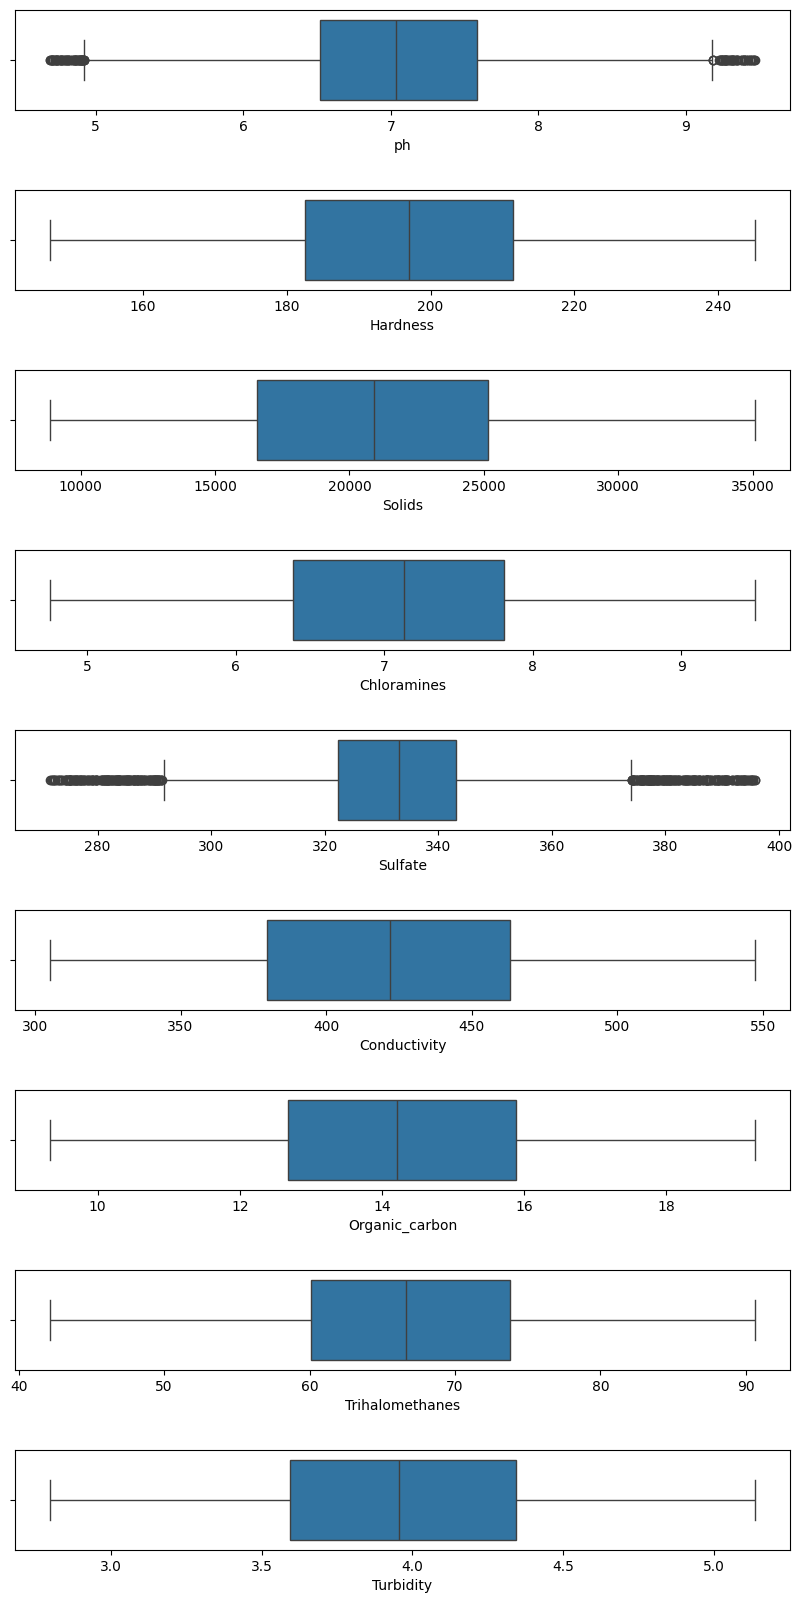

In [13]:
columnas = df_median.columns
fig, ax = plt.subplots(9,1, figsize=(10,20))
fig.subplots_adjust(hspace=0.80)
for i in range(9):
  sns.boxplot(x=columnas[i], data=df_median, ax=ax[i])

In [14]:
##Estadísticas de los datos
df_median.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.043086,0.980880,4.691438,6.518490,7.036752,7.583149,9.467129
Hardness,3276.0,196.762770,21.972966,147.117918,182.518953,196.967627,211.454112,245.090825
Solids,3276.0,21013.658795,6076.648566,8864.686480,16543.451455,20927.833607,25138.754192,35086.396963
Chloramines,3276.0,7.117051,1.050863,4.751005,6.385677,7.130299,7.805296,9.494582
Sulfate,3276.0,333.220562,24.428968,271.670562,322.363389,333.073546,343.043027,395.739529
Conductivity,3276.0,421.726102,57.423416,305.243600,379.656227,421.884968,463.043323,547.325318
Organic_carbon,3276.0,14.290961,2.281764,9.333898,12.678998,14.218338,15.892727,19.247141
Trihalomethanes,3276.0,66.727973,10.734760,42.168234,60.102079,66.622485,73.778271,90.619354
Turbidity,3276.0,3.964279,0.546251,2.798158,3.595011,3.955028,4.343496,5.136780
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [15]:
###Normalización - Escalar ##https://medium.com/analytics-vidhya/normalization-vs-standardization-8937f45b3e20
from sklearn.preprocessing import MinMaxScaler
def normaData(df):
    valores = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

CaguaNorm = normaData(df_median)

CaguaNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,0.492420,0.205390,0.0,0.382573,0.491094,0.605506,1.0
Hardness,3276.0,0.506720,0.224276,0.0,0.361335,0.508811,0.656673,1.0
Solids,3276.0,0.463317,0.231741,0.0,0.292840,0.460044,0.620633,1.0
Chloramines,3276.0,0.498790,0.221534,0.0,0.344608,0.501582,0.643879,1.0
Sulfate,3276.0,0.496095,0.196898,0.0,0.408586,0.494910,0.575264,1.0
Conductivity,3276.0,0.481170,0.237207,0.0,0.307386,0.481826,0.651845,1.0
Organic_carbon,3276.0,0.500044,0.230173,0.0,0.337437,0.492719,0.661623,1.0
Trihalomethanes,3276.0,0.506897,0.221559,0.0,0.370143,0.504720,0.652411,1.0
Turbidity,3276.0,0.498636,0.233578,0.0,0.340736,0.494680,0.660790,1.0
Potability,3276.0,0.390110,0.487849,0.0,0.000000,0.000000,1.000000,1.0


## **5. Correlación** ⚓

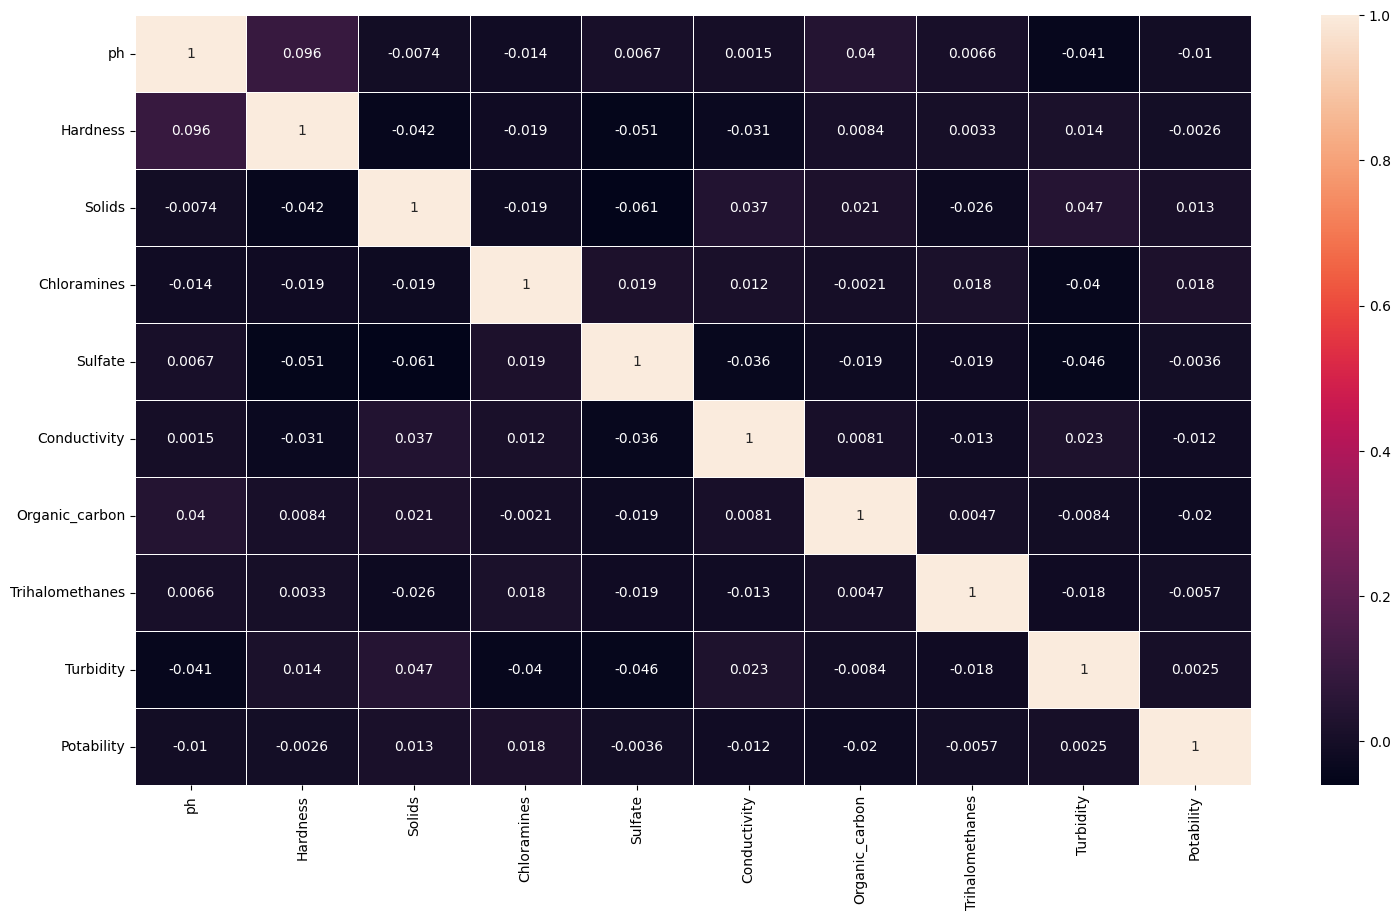

In [19]:
##Correlación https://www.researchgate.net/publication/327157958/figure/fig3/AS:662405763850242@1534941249411/Cross-correlation-coefficient-between-two-stations-at-different-locations-for-Pearson.png
##pearson, spearman, kendall
def DiagCorr(df, tamuno, tamdos, metodo):
  f, ax = plt.subplots(figsize=(tamuno, tamdos))
  sns.heatmap(df.corr(method=metodo), annot=True, linewidths=.5, ax=ax)

DiagCorr(CaguaNorm, 18, 10, 'spearman')

## **6. Test de Normalidad** 🌊

In [20]:
###https://i.ytimg.com/vi/LJ_zm8Pqe_Y/maxresdefault.jpg
##https://www.questionpro.com/es/calculadora-de-muestra.html

from scipy import stats

def testShapiroWilk(df):
  valoresP=[]
  concepto=[]
  variable=[]
  for column in df:
    k2, p_value = stats.shapiro(df[column].values)
    valoresP.append(p_value)
    variable.append(column)
    if (p_value < 0.05):
      concepto.append('No es una variable Normal')
    else:
      concepto.append('Es una variable Normal')
  dfShapiro = pd.DataFrame(
      {'Variable':variable, 'Valores de P:':valoresP, 'Concepto': concepto}
  )
  return dfShapiro

testShapiroWilk(CaguaNorm)

,Variable,Valores de P:,Concepto
0,ph,4.352009e-26,No es una variable Normal
1,Hardness,8.951545e-18,No es una variable Normal
2,Solids,1.189653e-20,No es una variable Normal
3,Chloramines,1.002740e-16,No es una variable Normal
4,Sulfate,8.573012e-33,No es una variable Normal
5,Conductivity,7.439294e-21,No es una variable Normal
6,Organic_carbon,1.813397e-19,No es una variable Normal
7,Trihalomethanes,6.206158e-20,No es una variable Normal
8,Turbidity,1.089021e-18,No es una variable Normal
9,Potability,5.642800e-65,No es una variable Normal


## **7. Exportar la data Limpia** ⛵

In [21]:
Cagua.to_csv('Cagualimpia.csv', index=False)

CaguaNorm.to_csv('CaguaNormLimpia.csv', index=False)

## **8. Definir la pregunta de Investigación** ☝

1. ¿Cuáles son las variables más importantes para la clasificación de la potabilidad del agua?

2. ¿Cuál es la probabilidad de clasificación de la potabilidad del agua con base en las variables más importantes?

3. ¿Cuál es la ruta más óptima para clasificar el agua como potable - 1?

4. ¿Cuál es la ruta más óptima para clasificar el agua como no potable - 0?

## **9. Primer Modelo RLOG 60% Train y 40% Test** 🧙

In [30]:
##Librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##X independientes - y dependiente
X = CaguaNorm.drop(['Potability'], axis=1)
y = CaguaNorm['Potability']

###Grupos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

mregloguno = LogisticRegression(solver='liblinear', random_state=42)

##Entrenamiento del modelo
mregloguno.fit(X_train, y_train)

##predicciones
y_pred_test = mregloguno.predict(X_test)

##Eficiencia general del modelo uno de REGLOG
print("La eficiencia general del modelo uno es: {0:0.4f}".format(accuracy_score(y_test, y_pred_test)))

##Luego de normalizar los datos, limpiar el ruido y datos NAN, teniendo en cuenta que la correlación de los datos es negativa, se procede
#a realizar una tarea de clasificación teniendo en cuenta la variable predictora Potability siendo 1 potable y 0 no potable, encontrando
#en el primer modelo de regresión logística sin hiperparámetros ni mejores características una eficiencia general de 0.62. Esto quiere
#decir que por cada 100 datos puede clasificar correctamente 62.


La eficiencia general del modelo uno es: 0.6280


In [31]:
##Matriz de confusión
mc = confusion_matrix(y_test, y_pred_test)

print("Matriz de confusión\n\n", mc)

print('True Negative (TN)=',mc[0,0])
print('True Positive (TP)=',mc[1,1])
print('False Positive (FP)=',mc[0,1])
print('False Negative (FN)=',mc[1,0])



Matriz de confusión

 [[412   0]
 [244   0]]
True Negative (TN)= 412
True Positive (TP)= 0
False Positive (FP)= 0
False Negative (FN)= 244


In [32]:
###Reporte de Clasificación
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       412
         1.0       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [33]:
CaguaNorm['Potability'].value_counts()

,count
Potability,
0.0,1998
1.0,1278


## **10. Hiperparámetrización** 🧑

In [34]:
from sklearn.model_selection import GridSearchCV

parametros = [{'penalty':['l1','l2']},
              {'C':[1,10,100,1000]},
              {'random_state':[None, 1,10,42,100,200]}]

gridsearch = GridSearchCV(estimator=mregloguno,
                          param_grid=parametros,
                          scoring='f1',
                          cv=10,
                          verbose=0)

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]},
                         {'random_state': [None, 1, 10, 42, 100, 200]}],
             scoring='f1')

## **11. Balanceo de Datos (Potability)** 🧲

In [35]:
CaguaNorm['Potability'].value_counts()

,count
Potability,
0.0,1998
1.0,1278


Text(0.5, 1.0, 'Distribución de potabilidad')

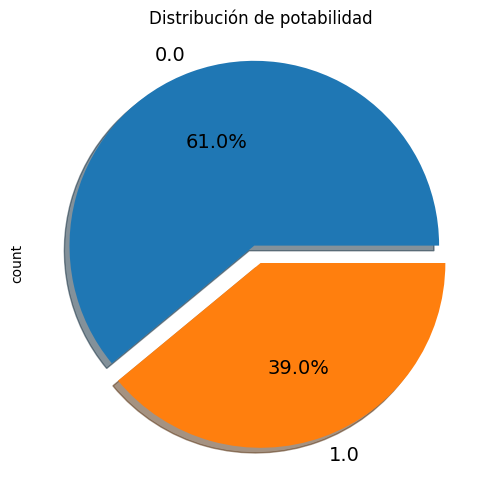

In [41]:
##Grafica de pie
plt.figure(figsize=(6,6))

CaguaNorm['Potability'].value_counts().plot.pie(explode=[0.1, 0.0],
                                                autopct='%1.1f%%', shadow=True,
                                                textprops={'fontsize':14}).set_title('Distribución de potabilidad')

In [42]:
##Implementar resample para balanceo de datos
from sklearn.utils import resample

##1278
minoritaria = CaguaNorm[CaguaNorm['Potability']==1]
##1998
mayoritaria = CaguaNorm[CaguaNorm['Potability']==0]

minor_oversample = resample(minoritaria, replace=True, n_samples=len(mayoritaria), random_state=42)

CaguaOver = pd.concat([mayoritaria, minor_oversample])

CaguaOver['Potability'].value_counts()

,count
Potability,
0.0,1998
1.0,1998


Text(0.5, 1.0, 'Distribución de potabilidad')

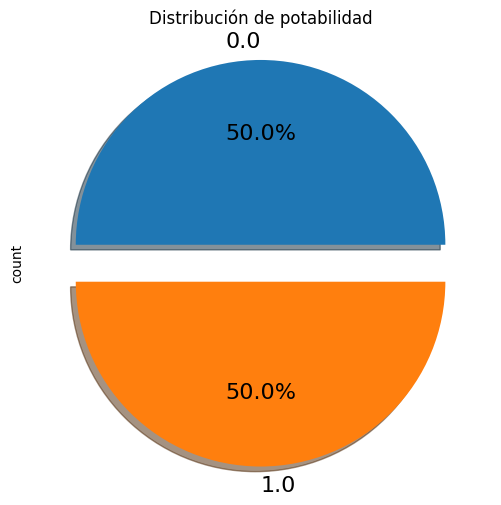

In [43]:
##Grafica de pie
plt.figure(figsize=(6,6))

CaguaOver['Potability'].value_counts().plot.pie(explode=[0.1, 0.1],
                                                autopct='%1.1f%%', shadow=True,
                                                textprops={'fontsize':16}).set_title('Distribución de potabilidad')

## **12. Oversampling Nuevo Modelo** 🧙

In [44]:
###Nuevo Modelo Oversampling
##X independientes - y dependiente
X = CaguaOver.drop(['Potability'], axis=1)
y = CaguaOver['Potability']

###Grupos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

mreglogdos = LogisticRegression(solver='liblinear', random_state=42, penalty='l1')

##Entrenamiento del modelo
mreglogdos.fit(X_train, y_train)

##predicciones
y_pred_test = mreglogdos.predict(X_test)

##Eficiencia general del modelo uno de REGLOG
print("La eficiencia general del modelo uno es: {0:0.4f}".format(accuracy_score(y_test, y_pred_test)))

La eficiencia general del modelo uno es: 0.5012


In [45]:
###Reporte de Clasificación
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.52      0.45      0.48       415
         1.0       0.48      0.56      0.52       385

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800



## **13. Mejores características** 😋

La eficiencia general del modelo con arbol es: 0.71
Organic_carbon:0.1310
Hardness:0.1278
Sulfate:0.1153
Chloramines:0.1139
Solids:0.1127
Conductivity:0.1044
ph:0.1037
Trihalomethanes:0.1031
Turbidity:0.0881


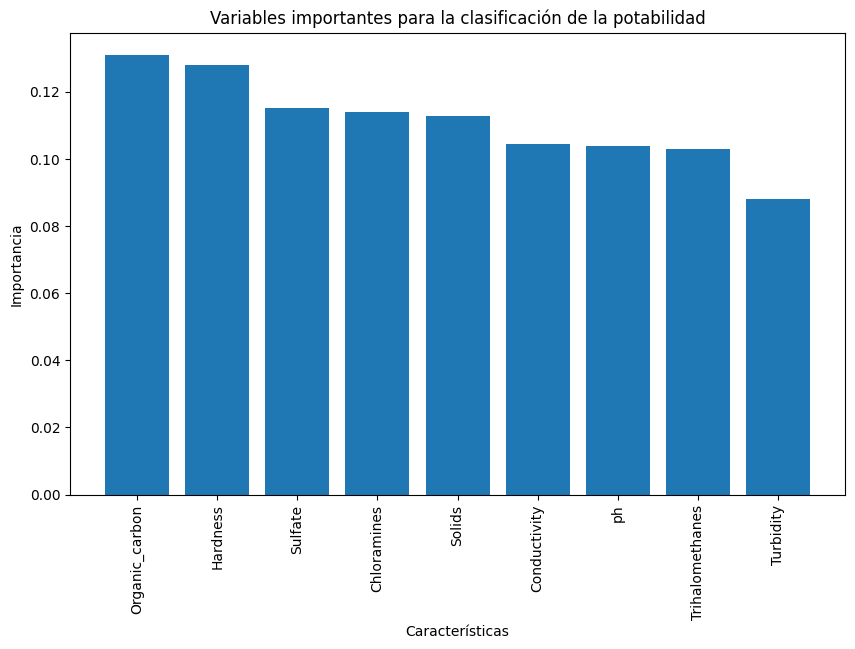

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

##Crear el clasificador para el modelo
dtc = DecisionTreeClassifier(random_state=42)

##Entrenar el modelo
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

##Calcular métricas
accuracy= accuracy_score(y_test, y_pred)
print(f'La eficiencia general del modelo con arbol es: {accuracy:.2f}')

##Variables importantes
importantes = dtc.feature_importances_

##Organizar de mayor a menor
organizar = np.argsort(importantes)[::-1]

##Extraer los nombres de columnas
feature_names = X_train.columns.to_list()

##Imprimir cuales son las variables
for i in organizar:
  print(f'{feature_names[i]}:{importantes[i]:.4f}')

##Visualización de las variables
plt.figure(figsize=(10,6))
plt.title('Variables importantes para la clasificación de la potabilidad')
plt.bar(range(len(importantes)), importantes[organizar], align='center')
plt.xticks(range(len(importantes)), [feature_names[i] for i in organizar], rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.60      0.68       415
         1.0       0.66      0.83      0.73       385

    accuracy                           0.71       800
   macro avg       0.72      0.71      0.71       800
weighted avg       0.72      0.71      0.70       800



## **14. Modelo REG LOG con mejores características, oversampling y normalización**

In [48]:
CaguaMejor = CaguaOver.drop(['Trihalomethanes','Turbidity','Conductivity'], axis=1)

CaguaMejor.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Potability
0,0.491094,0.589679,0.454838,0.537402,0.780581,0.105504,0.0
1,0.491094,0.508811,0.372415,0.397219,0.494910,0.589728,0.0
2,0.713548,0.787139,0.421210,0.953896,0.494910,0.760068,0.0
3,0.759121,0.686470,0.501635,0.697433,0.686840,0.918229,0.0
4,0.921497,0.346867,0.347586,0.378532,0.310031,0.224385,0.0


In [49]:
X = CaguaMejor.drop(['Potability'], axis=1)
y = CaguaMejor['Potability']

###Grupos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

mreglogtres = LogisticRegression(solver='liblinear', random_state=42, penalty='l1')

##Entrenamiento del modelo
mreglogtres.fit(X_train, y_train)

##predicciones
y_pred_test = mreglogtres.predict(X_test)

##Eficiencia general del modelo uno de REGLOG
print("La eficiencia general del modelo uno es: {0:0.4f}".format(accuracy_score(y_test, y_pred_test)))

La eficiencia general del modelo uno es: 0.5038


In [50]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.52      0.42      0.47       617
         1.0       0.49      0.59      0.53       582

    accuracy                           0.50      1199
   macro avg       0.51      0.51      0.50      1199
weighted avg       0.51      0.50      0.50      1199



In [51]:
##Arbol con características aplicadas
##Crear el clasificador para el modelo
dtcd = DecisionTreeClassifier(random_state=42)

##Entrenar el modelo
dtcd.fit(X_train, y_train)

y_pred = dtcd.predict(X_test)

##Calcular métricas
accuracy= accuracy_score(y_test, y_pred)
print(f'La eficiencia general del modelo con arbol es: {accuracy:.2f}')

La eficiencia general del modelo con arbol es: 0.72


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.63      0.70       617
         1.0       0.68      0.82      0.74       582

    accuracy                           0.72      1199
   macro avg       0.73      0.73      0.72      1199
weighted avg       0.73      0.72      0.72      1199



## **15. Análisis final**

¿Cuáles son las variables más importantes para la clasificación de la potabilidad del agua?
para poder clasificar en agua potable o no potable las mejores características fueron: ph	Hardness,	Solids,	Chloramines	,Sulfate,	Organic_carbon. Se usó el modelo reglog sin parámetros con todas las características una eficiencia del 0.61, pero no tenía en cuenta la categoría 1 agua potable.

Se realizó un modelo decision tree para verificar la mejoría de la clasificación encontrando un valor de 0.71 de eficiencia general y para la clase 0 un valor de eficiencia 0.69 y para la clase 1 un valor de eficiencia de 0.74, esto con las variables sugeridas.

¿Cuál es la probabilidad de clasificación de la potabilidad del agua con base en las variables más importantes? Aplicando undersampling (resample), oversampling ( smote), undersampling(smote), Hiperparametrización gridsearchCV, randomsearchCV y BayesianCV para el árbol de decisión.